In [1]:
import pandas as pd
import numpy as np
from geopy import distance
from matplotlib import pyplot as plt

In [2]:
data=pd.read_pickle('processed_data.pickle')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   workload  2769 non-null   float64
 1   location  2769 non-null   object 
dtypes: float64(1), object(1)
memory usage: 43.4+ KB


In [5]:
def accessDelay(solution, data):
    delay = 0
    i = 0
    for location in solution:
        print(i)
        delay += distance.distance(data.iloc[location]['location'],data.iloc[i]['location']).km
        i+=1
    return delay

def workloadBalance(solution, data):
    servers = dict.fromkeys(solution,0)
    for index,row in data.iterrows():
        servers[solution[index]] +=  row['workload']
    total = 0
    mean = sum(servers.values())/len(servers)
    for key,value in servers.items():
        total += (value - mean)**2
    return np.sqrt(total/len(servers))

In [18]:
solution =top_k_solution(data, 5)   

In [19]:
servers = dict.fromkeys(solution,0)

In [20]:
servers

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

In [21]:
def top_k_solution(data, server_count):
    data = data.sort_values(by='workload', ascending=False).reset_index(drop=True)
    solution = []
    for i in range(0,len(data)):
        closest_server = 0
        min_dist = np.inf
        for server in range(server_count):
            dist = distance.distance(data.iloc[i]['location'],data.iloc[server]['location']).km
            if dist < min_dist:
                closest_server = server
                min_dist = dist
        solution.append(closest_server)
    return solution

def show_top_k_results(data):
    server_counts = []
    ads = []
    wbs = []
    data = data.sort_values(by='workload', ascending=False).reset_index(drop=True)
    for server_count in range(6,100,3):
        solution = top_k_solution(data, server_count)
        ads.append(accessDelay(solution, data))
        wbs.append(workloadBalance(solution, data))
        server_counts.append(server_count)
    plt.xlabel("Number of Edge Servers")
    plt.ylabel("Workload Balance")
    plt.scatter(server_counts,wbs)
    plt.show()
    plt.xlabel("Number of Edge Servers")
    plt.ylabel("Access Delay")
    plt.scatter(server_counts,ads)
    plt.show()

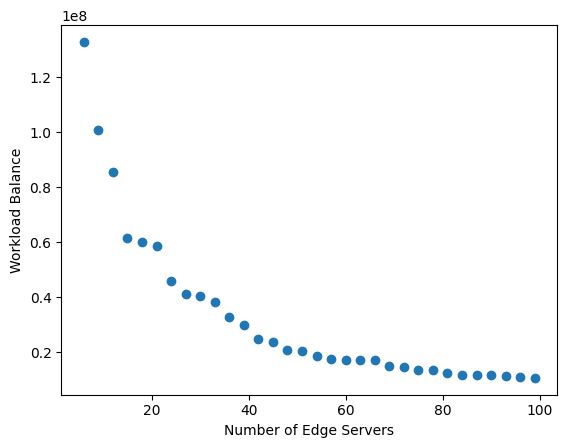

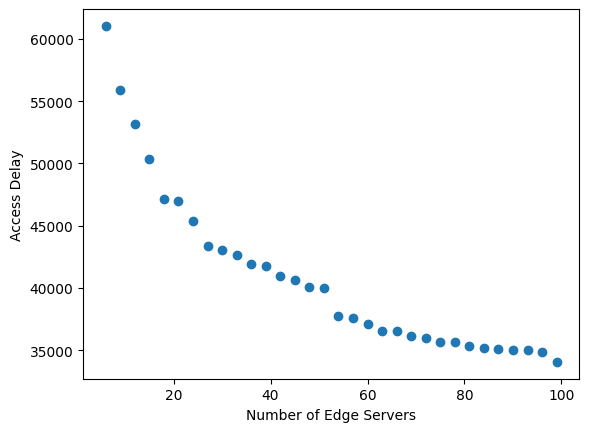

In [5]:
show_top_k_results(data)